<a href="https://colab.research.google.com/github/Barasinghaa/Deep_learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

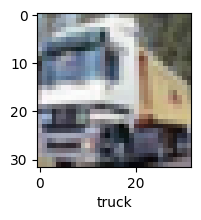

In [ ]:
plot_sample(X_train,y_train,1)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train=X_train/255
X_test=X_test/255

ANN

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 4ms/step - loss: 1.8155 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6206 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5435 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4809 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4323 - accuracy: 0.4959


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4677 - accuracy: 0.4705


[1.4677454233169556, 0.47049999237060547]

CNN

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.5095 - accuracy: 0.4493
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1235 - accuracy: 0.6022
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9814 - accuracy: 0.6552
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8958 - accuracy: 0.6868
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8179 - accuracy: 0.7136
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7609 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7080 - accuracy: 0.7528
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6594 - accuracy: 0.7677
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6205 - accuracy: 0.7832
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9271 - accuracy: 0.7056


[0.9270739555358887, 0.7056000232696533]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[7.4081868e-04, 1.8940953e-05, 4.8076111e-04, 9.3283474e-01,
        3.1828016e-04, 5.9875041e-02, 1.2297205e-03, 1.5788344e-05,
        3.9473516e-03, 5.3857220e-04],
       [2.9578063e-05, 2.5930943e-03, 1.8969963e-06, 5.3763728e-08,
        3.8962160e-08, 2.5497284e-08, 1.3346830e-08, 2.2676445e-09,
        9.9717700e-01, 1.9827315e-04],
       [8.1377681e-03, 7.1981892e-02, 3.8885961e-03, 3.6160906e-03,
        2.0991222e-03, 8.7602576e-04, 2.0052401e-04, 4.4977851e-04,
        8.9675707e-01, 1.1993208e-02],
       [9.2131561e-01, 7.2874273e-03, 8.5892517e-04, 7.3802723e-05,
        1.1416486e-03, 4.7008484e-06, 1.8517701e-05, 8.6078699e-06,
        6.9156520e-02, 1.3421536e-04],
       [1.0433505e-06, 6.5492668e-06, 4.3091197e-02, 2.0850532e-02,
        1.9577383e-01, 4.6338953e-04, 7.3955369e-01, 1.6495588e-06,
        2.5460721e-04, 3.5642129e-06]], dtype=float32)

In [ ]:
y_value=[np.argmax(item) for item in y_pred]

In [ ]:
y_value[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)